In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('Downloads/Zomato-data-.csv')


In [11]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [12]:
#convert the data type of the “rate” column to float and remove the denominator
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

df['rate']=df['rate'].apply(handleRate)


In [13]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Text(0.5, 0, 'Type of restaurant')

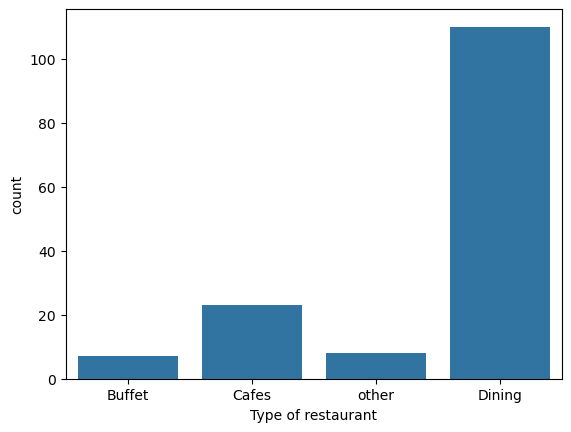

In [17]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Type of restaurant")


Text(0, 0.5, 'Votes')

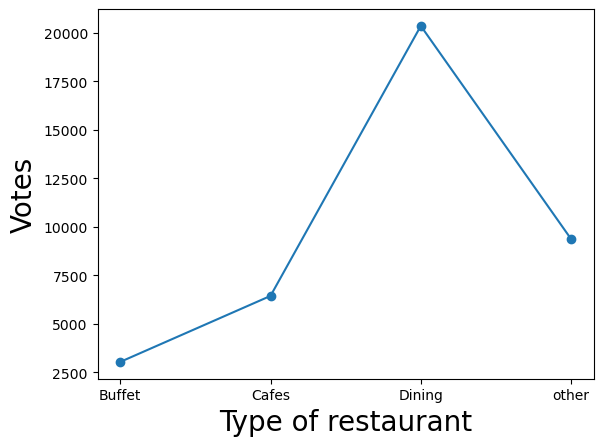

In [25]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, marker='o')
plt.xlabel('Type of restaurant', size=20)
plt.ylabel( 'Votes', size=20)


In [26]:
max_votes = df['votes'].max()
restaurant_with_max_votes = df.loc[df['votes'] == max_votes, 'name']

print('Restaurant(s) with the maximum votes:')
print(restaurant_with_max_votes)


Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

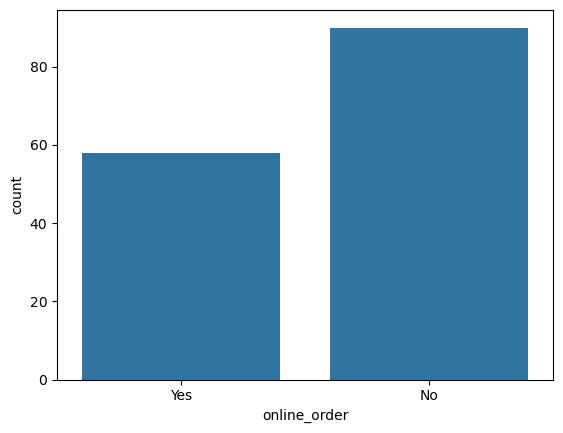

In [27]:
sns.countplot(x=df['online_order'])


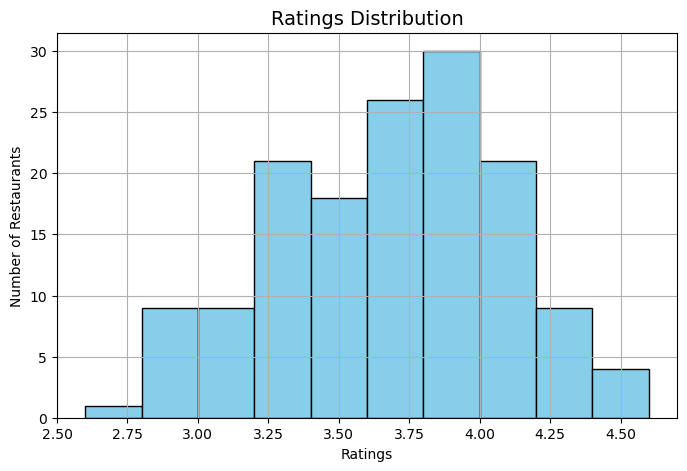

In [32]:
plt.figure(figsize=(8, 5))
plt.hist(df['rate'].dropna(), bins=10, color='skyblue', edgecolor='black')
plt.title('Ratings Distribution', fontsize=14)
plt.xlabel('Ratings')
plt.ylabel('Number of Restaurants')
plt.grid(True)
plt.show()


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

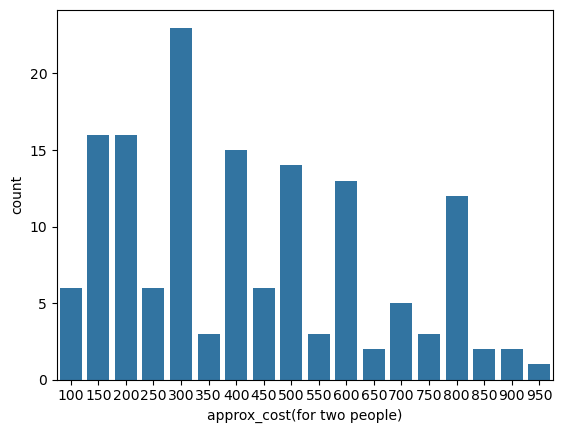

In [29]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)


<Axes: xlabel='online_order', ylabel='rate'>

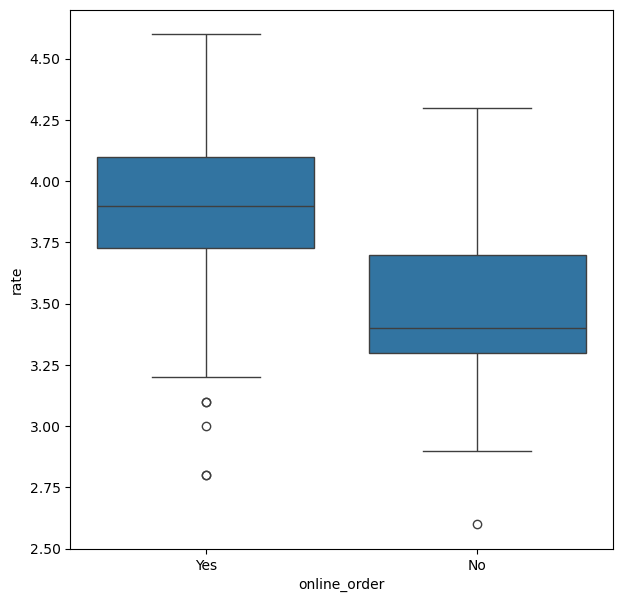

In [30]:
plt.figure(figsize = (7,7))
sns.boxplot(x = 'online_order', y = 'rate', data = df)


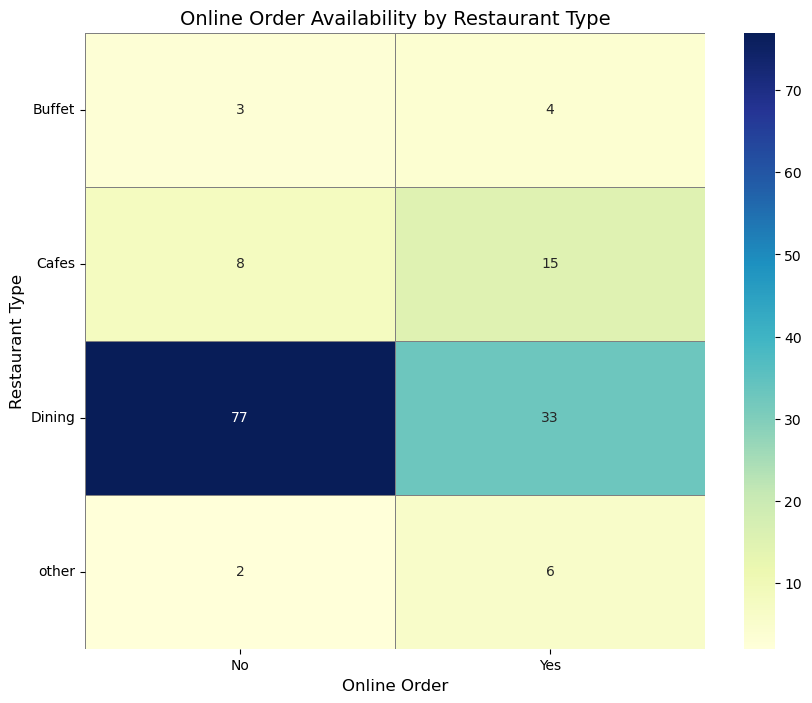

In [33]:
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d', linewidths=0.5, linecolor='gray')
plt.title('Online Order Availability by Restaurant Type', fontsize=14)
plt.xlabel('Online Order', fontsize=12)
plt.ylabel('Restaurant Type', fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()
